# Calculating the Pumps efficency curves 

Byrjum á Vatnsenda neðra kerfi

In [242]:
import matplotlib.pyplot as plt
import pandas as pd

## Pressure in mH20

In [243]:
Vatnsendi_nedri_pressure = pd.read_excel('/Users/frodibrooks/Desktop/DTU/Thesis/OptimisedHeating/Data_processing/data/H-KOP-VE-ÞS213.xlsx')
Vatnsendi_nedri_pressure.drop(columns=["mpoint_id","mpoint_name","aggregate_name","aggregate_id","flag","quality_description","event_time"],inplace=True)
Vatnsendi_nedri_pressure['start_time'] = pd.to_datetime(Vatnsendi_nedri_pressure['start_time'], errors='coerce')
Vatnsendi_nedri_pressure.set_index('start_time',inplace=True)
Vatnsendi_nedri_pressure = Vatnsendi_nedri_pressure.sort_index(ascending=True)

Vatnsendi_nedri_pressure_2024 = Vatnsendi_nedri_pressure.loc['2024']
Vatnsendi_nedri_pressure_2024 = Vatnsendi_nedri_pressure_2024.copy()
Vatnsendi_nedri_pressure_2024.rename(columns={"value":"mH20"},inplace=True)
Vatnsendi_nedri_pressure_2024["mH20"] = Vatnsendi_nedri_pressure_2024['mH20']* 10.197
Vatnsendi_nedri_pressure_2024 = Vatnsendi_nedri_pressure_2024.drop('2024-08-21 01:00:00') # Drop the outlier
Vatnsendi_nedri_pressure_2024.head()


,mH20
start_time,
2024-01-01 01:00:00,57.10320
2024-01-01 02:00:00,57.10320
2024-01-01 03:00:00,56.89926
2024-01-01 04:00:00,56.59335
2024-01-01 05:00:00,56.38941


In [244]:
# import matplotlib.pyplot as plt

# # Scatter plot
# plt.figure(figsize=(10, 6))
# plt.scatter(Vatnsendi_nedri_pressure_2024.index, Vatnsendi_nedri_pressure_2024["mH20"], alpha=0.6, color='blue')
# plt.title("Scatter Plot of mH20 Over Time (2024)", fontsize=14)
# plt.xlabel("Time", fontsize=12)
# plt.ylabel("mH20 (meters of water)", fontsize=12)
# plt.grid(True, linestyle='--', alpha=0.5)
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()

## Input pressure

In [ ]:
Vatnsendi_nedri_input_pressure = pd.read_excel('/Users/frodibrooks/Desktop/DTU/Thesis/OptimisedHeating/Data_processing/data/Vatnsendi-Rjupnasalir-PrePumpPressure.xlsx')
Vatnsendi_nedri_input_pressure.drop(columns=["mpoint_id","aggregate_name","aggregate_id","flag","quality_description","event_time"],inplace=True)

Vatnsendi_nedri_input_pressure = Vatnsendi_nedri_input_pressure[Vatnsendi_nedri_input_pressure['mpoint_name'] == 'Rjúpnasalir - Stöðvarþrýstingur']



# # Ensure start_time is a string (in case it's partially formatted)
# Vatnsendi_nedri_input_pressure['start_time'] = Vatnsendi_nedri_input_pressure['start_time'].astype(str)

# # Drop rows where 'start_time' only has date (missing time)
# Vatnsendi_nedri_input_pressure = Vatnsendi_nedri_input_pressure[
#     ~Vatnsendi_nedri_input_pressure['start_time'].str.match(r'^\d{4}-\d{2}-\d{2}$', na=False)
# ]

# Convert the remaining valid 'start_time' to datetime
Vatnsendi_nedri_input_pressure['start_time'] = pd.to_datetime(Vatnsendi_nedri_input_pressure['start_time'], errors='coerce')

# Set 'start_time' as index and sort
Vatnsendi_nedri_input_pressure.set_index('start_time', inplace=True)
Vatnsendi_nedri_input_pressure = Vatnsendi_nedri_input_pressure.sort_index(ascending=True)

# Clean up the DataFrame
Vatnsendi_nedri_input_pressure.drop(columns=["mpoint_name"], inplace=True)
Vatnsendi_nedri_input_pressure.rename(columns={"value":"Input mH20"}, inplace=True)
Vatnsendi_nedri_input_pressure['Input mH20'] = Vatnsendi_nedri_input_pressure['Input mH20'] * 10.197

# Display the DataFrame
Vatnsendi_nedri_input_pressure_2024 = Vatnsendi_nedri_input_pressure.loc['2024']
Vatnsendi_nedri_input_pressure_2024 = Vatnsendi_nedri_input_pressure_2024.copy()
Vatnsendi_nedri_input_pressure_2024.head()


,Input mH20
start_time,
2024-01-01 01:00:00,60.97806
2024-01-01 02:00:00,60.77412
2024-01-01 03:00:00,60.36624
2024-01-01 04:00:00,59.34654
2024-01-01 05:00:00,58.93866


In [246]:
# # Scatter plot
# plt.figure(figsize=(10, 6))
# plt.scatter(Vatnsendi_nedri_input_pressure.index, Vatnsendi_nedri_input_pressure["mH20"], alpha=0.6, color='green')
# plt.title("Scatter Plot of mH20 Over Time (Input Pressure)", fontsize=14)
# plt.xlabel("Time", fontsize=12)
# plt.ylabel("mH20 (meters of water)", fontsize=12)
# plt.grid(True, linestyle='--', alpha=0.5)
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()

In [247]:
Vatnsendi_pressure_difference = pd.DataFrame()
Vatnsendi_pressure_difference['difference in mH20'] = Vatnsendi_nedri_pressure_2024['mH20'] - Vatnsendi_nedri_input_pressure_2024['Input mH20']
Vatnsendi_pressure_difference.head()


,difference in mH20
start_time,
2024-01-01 01:00:00,-3.87486
2024-01-01 02:00:00,-3.67092
2024-01-01 03:00:00,-3.46698
2024-01-01 04:00:00,-2.75319
2024-01-01 05:00:00,-2.54925


## Flow in lps

In [248]:
Vatnsendi_nedri_flow = pd.read_excel('/Users/frodibrooks/Desktop/DTU/Thesis/OptimisedHeating/Data_processing/data/H-KOP-VE-RS213.xlsx')
Vatnsendi_nedri_flow.drop(columns=["mpoint_id","mpoint_name","aggregate_name","aggregate_id","flag","quality_description","event_time"],inplace=True)
Vatnsendi_nedri_flow['start_time'] = pd.to_datetime(Vatnsendi_nedri_flow['start_time'], errors='coerce')
Vatnsendi_nedri_flow.set_index('start_time',inplace=True)
Vatnsendi_nedri_flow = Vatnsendi_nedri_flow.sort_index(ascending=True)
Vatnsendi_nedri_flow_2024 = Vatnsendi_nedri_flow.loc['2024']
Vatnsendi_nedri_flow_2024 = Vatnsendi_nedri_flow_2024.copy()    
Vatnsendi_nedri_flow_2024.rename(columns={'value': 'Flæði [l/s]'}, inplace=True)
Vatnsendi_nedri_flow_2024['Flæði [l/s]'] = Vatnsendi_nedri_flow_2024['Flæði [l/s]']
Vatnsendi_nedri_flow_2024.head()

,Flæði [l/s]
start_time,
2024-01-01 01:00:00,35.08
2024-01-01 02:00:00,34.54
2024-01-01 03:00:00,33.80
2024-01-01 04:00:00,33.28
2024-01-01 05:00:00,32.60


## Energy consumption in pump

In [249]:
df_pumps = pd.read_csv('/Users/frodibrooks/Desktop/DTU/Thesis/OptimisedHeating/Data_processing/Vatnsendi_rjupnasalir_pumppower_modfied.csv')

df_pumps = df_pumps[['mpoint_id','start_time','value']]
df_pumps['start_time'] = pd.to_datetime(df_pumps['start_time'], errors='coerce')
df_pumps.set_index('start_time', inplace=True)
df_pumps = df_pumps.sort_index(ascending=True)
df_pumps.head()

,mpoint_id,value
start_time,,
2022-01-01,H-KOP-VE-DÆ222-PS,0.000000
2022-01-01,H-KOP-RS-DÆ212-PS,28.914787
2022-01-01,H-KOP-VE-DÆ212-PS,17.676978
2022-01-01,H-KOP-VE-DÆ213-PS,5.088386
2022-01-01,H-KOP-RS-DÆ211-PS,11.380736


In [250]:
Vatnsendi_nedri_dæla = df_pumps[df_pumps['mpoint_id'] == 'H-KOP-VE-DÆ213-PS']
Vatnsendi_nedri_dæla_2024 = Vatnsendi_nedri_dæla.loc['2024']
Vatnsendi_nedri_dæla_2024 = Vatnsendi_nedri_dæla_2024.copy()
Vatnsendi_nedri_dæla_2024.drop(columns=['mpoint_id'],inplace=True)
Vatnsendi_nedri_dæla_2024.rename(columns={'value': 'kW'}, inplace=True)
Vatnsendi_nedri_dæla_2024.head()

,kW
start_time,
2024-01-01 00:00:00,0.0
2024-01-01 01:00:00,0.0
2024-01-01 02:00:00,0.0
2024-01-01 03:00:00,0.0
2024-01-01 04:00:00,0.0


## Theoretical power

In [251]:
df_calc_eff = pd.concat([Vatnsendi_nedri_pressure_2024,Vatnsendi_nedri_input_pressure_2024,Vatnsendi_pressure_difference,Vatnsendi_nedri_flow_2024,Vatnsendi_nedri_dæla_2024],axis=1,join='outer')
df_calc_eff['Theoretical power'] = df_calc_eff['Flæði [l/s]']*(df_calc_eff['difference in mH20'])*9.81/1000
df_calc_eff.head()

,mH20,Input mH20,difference in mH20,Flæði [l/s],kW,Theoretical power
start_time,,,,,,
2024-01-01 00:00:00,NaN,NaN,NaN,NaN,0.0,NaN
2024-01-01 01:00:00,57.10320,60.97806,-3.87486,35.08,0.0,-1.333474
2024-01-01 02:00:00,57.10320,60.77412,-3.67092,34.54,0.0,-1.243845
2024-01-01 03:00:00,56.89926,60.36624,-3.46698,33.80,0.0,-1.149574
2024-01-01 04:00:00,56.59335,59.34654,-2.75319,33.28,0.0,-0.898853


## Pump Efficiency

In [252]:
df_calc_eff['Efficiency'] = df_calc_eff['kW']/df_calc_eff['Theoretical power']
df_calc_eff.head()

,mH20,Input mH20,difference in mH20,Flæði [l/s],kW,Theoretical power,Efficiency
start_time,,,,,,,
2024-01-01 00:00:00,NaN,NaN,NaN,NaN,0.0,NaN,NaN
2024-01-01 01:00:00,57.10320,60.97806,-3.87486,35.08,0.0,-1.333474,-0.0
2024-01-01 02:00:00,57.10320,60.77412,-3.67092,34.54,0.0,-1.243845,-0.0
2024-01-01 03:00:00,56.89926,60.36624,-3.46698,33.80,0.0,-1.149574,-0.0
2024-01-01 04:00:00,56.59335,59.34654,-2.75319,33.28,0.0,-0.898853,-0.0


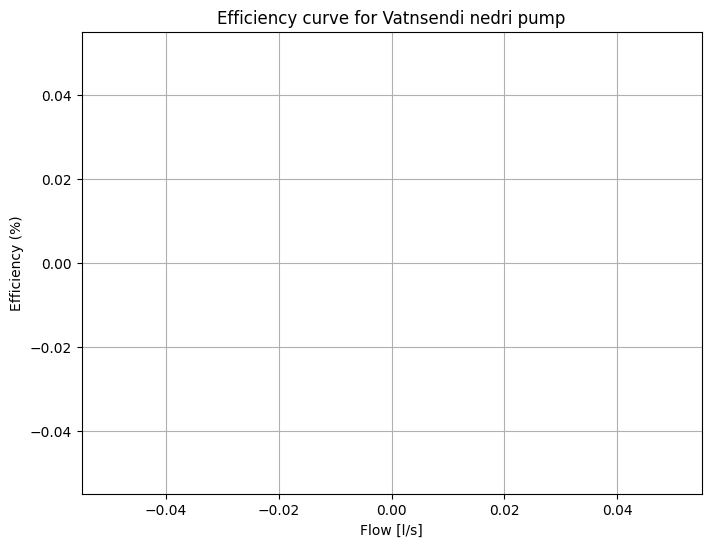

In [253]:


# Drop rows where 'Efficiency' or 'Flæði(l/s)' is NaN or zero
df_clean = df_calc_eff.dropna(subset=['Flæði [l/s]', 'Efficiency'])
df_clean = df_clean[df_clean['Efficiency'] > 0]  # Remove rows where Efficiency is 0
df_clean = df_clean[df_clean['Efficiency'] < 1]  # Remove rows where Efficiency is 0
df_clean_month = df_clean.loc['2024-04']


# Plot Efficiency vs Flow
plt.figure(figsize=(8, 6))
plt.scatter(df_clean['Flæði [l/s]'], df_clean['Efficiency'], marker='o', color='b',alpha = 0.1)

# Adding titles and labels
plt.title('Efficiency curve for Vatnsendi nedri pump')
plt.xlabel('Flow [l/s]')
plt.ylabel('Efficiency (%)')
plt.grid(True)

# Display the plot
plt.show()

In [254]:
specific_day = '2024-04-05'
filtered_data = df_calc_eff.loc[specific_day]

filtered_data

,mH20,Input mH20,difference in mH20,Flæði [l/s],kW,Theoretical power,Efficiency
start_time,,,,,,,
2024-04-05 00:00:00,NaN,NaN,NaN,NaN,4.623127,NaN,NaN
2024-04-05 01:00:00,56.79729,50.57712,6.22017,29.34,4.842067,1.790323,2.704577
2024-04-05 02:00:00,56.79729,50.37318,6.42411,29.26,4.805787,1.843980,2.606203
2024-04-05 03:00:00,56.79729,50.27121,6.52608,29.29,4.951763,1.875171,2.640700
2024-04-05 04:00:00,56.49138,50.47515,6.01623,29.11,4.688665,1.718049,2.729063
2024-04-05 05:00:00,56.28744,50.88303,5.40441,29.79,4.575975,1.579384,2.897316
2024-04-05 06:00:00,56.89926,52.10667,4.79259,30.97,4.529657,1.456064,3.110892
2024-04-05 07:00:00,57.10320,54.55395,2.54925,33.96,3.885114,0.849277,4.574616
2024-04-05 08:00:00,57.00123,53.94213,3.05910,33.17,4.072340,0.995424,4.091061
